# Assignment 15

## Chapter 11, Problem 16(a) (from Greenbaum-Chartier)

The following simple model describes the switching behavior for a muscle
that controls a valve in the heart. Let $x(t)$ denote the position of the muscle
at time $t$ and let $α(t)$ denote the concentration at time $t$ of a chemical
stimulus. Suppose that the dynamics of $x$ and $α$ are controlled by the
system of differential equations

$$
\frac{dx}{dt} = -\frac{x^3}{3}+x+\alpha\\
\frac{d\alpha}{dt} = -\epsilon x
$$

Here $\epsilon > 0$ is a parameter; its inverse estimates roughly the time that x
spends near one of its rest positions.

Taking $\epsilon = 1/100$, $x(0) = 2$, and $α(0) = 2/3$, solve this system
of differential equations using an explicit method of your choice.
Integrate out to, say, $t = 400$, and turn in plots of $x(t)$ and $α(t)$.
Explain why you chose the method that you used and approximately
how accurate you think your computed solution is and why. Comment
on whether you seemed to need restrictions on the step size for stability
or whether accuracy was the only consideration in choosing your step
size.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# define the ODE functions
def position(t,x,a, epsilon):
  return -(x**3/3) + x + a

def concentration(t,x,a, epsilon):
  return - epsilon * x

def euler_method(t0, x0, a0, tN, epsilon, h):
  t = np.arange(t0, tN, h)  # time points

  # initialize solution arrays
  xs = np.zeros((len(t),))
  as_ = np.zeros((len(t),))
  Kx1  = np.zeros((len(t),))
  Ka1  = np.zeros((len(t),))
  Kx2  = np.zeros((len(t),))
  Ka2  = np.zeros((len(t),))

  # set initial condition
  xs[0] = x0
  as_[0] = a0

  for i in range(1, len(t)):
      Kx1[i-1] = position(t[i-1],xs[i-1],as_[i-1],epsilon)
      Ka1[i-1] = concentration(t[i-1],xs[i-1],as_[i-1],epsilon)

      Kx2[i] = position(t[i], xs[i-1]+Kx1[i-1]*h, as_[i-1]+Ka1[i-1]*h, epsilon)
      Ka2[i] = concentration(t[i], xs[i-1]+Kx1[i-1]*h, as_[i-1]+Ka1[i-1]*h, epsilon)

      xs[i] = xs[i-1] + (h/2) * (Kx1[i-1]+Kx2[i])
      as_[i] = as_[i-1] + (h/2) * (Ka1[i-1]+Ka2[i])

  return t, xs, as_

# initial conditions
t0 = 0
tN = 400
x0 = 2.0
a0 = 2/3
h = 0.1
epsilon = 1/100

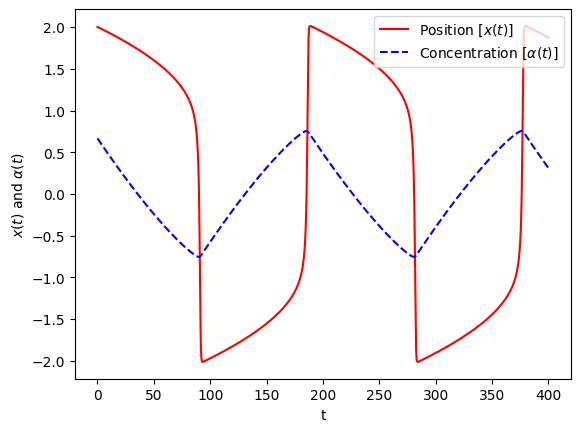

In [37]:
t, xs, as_ = euler_method(t0, x0, a0, tN, epsilon, h)
plt.plot(t, xs ,'r-',t, as_,'b--')
plt.legend([r'Position [$x(t)$]', r'Concentration [$\alpha(t)$]'])
plt.xlabel('t')
plt.ylabel(r'$x(t)$ and $\alpha(t)$')
plt.show()

**Solution:** Here, we have used Runge-Kutta 2 method to numerically solve the system of ODEs given to us. This is a relatively accurate algorithm and given the solutions we obtained we can say that the solution is fairly accurate. That is, the solution is periodic and does to seem to diverge at all.

We can run the same simulation using a higher or lower step size.

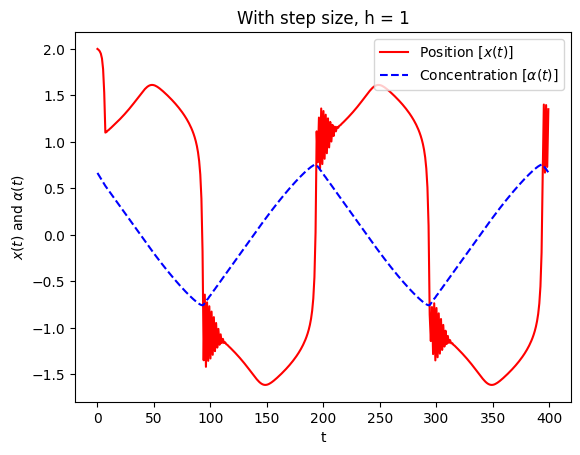

In [44]:
t, xs, as_ = euler_method(t0, x0, a0, tN, epsilon, h=1)
plt.plot(t, xs ,'r-',t, as_,'b--')
plt.legend([r'Position [$x(t)$]', r'Concentration [$\alpha(t)$]'])
plt.xlabel('t')
plt.ylabel(r'$x(t)$ and $\alpha(t)$')
plt.title('With step size, h = 1')
plt.show()

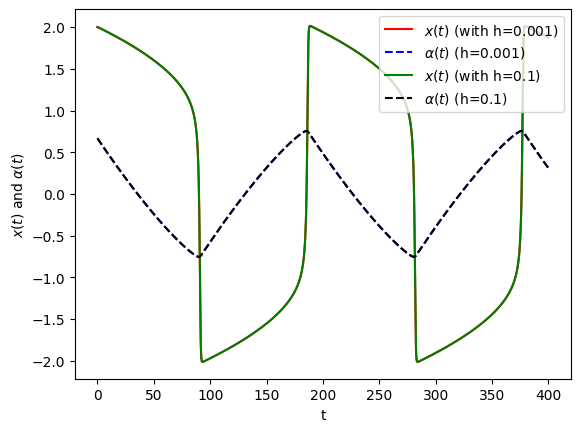

In [43]:
t, xs, as_ = euler_method(t0, x0, a0, tN, epsilon, h=0.001)
t1, xs1, as_1 = euler_method(t0, x0, a0, tN, epsilon, h=0.1)
plt.plot(t, xs ,'r-',t, as_,'b--')
plt.plot(t1, xs1 ,'g-',t1, as_1,'k--')
plt.legend([r'$x(t)$ (with h=0.001)', r'$\alpha(t)$ (h=0.001)', r'$x(t)$ (with h=0.1)', r'$\alpha(t)$ (h=0.1)'])
plt.xlabel('t')
plt.ylabel(r'$x(t)$ and $\alpha(t)$')
plt.show()

Here, we can see that increasing the step size made our solution highly unstable at certain points, and decreasing it gave us the same solution (after more computational time). We have also compared the solutions obtained using two different step sizes in the above plot and we can see that they overlap almost completely.

Hence $h \sim 0.1$ is a good enough step size for our problem, which balances both accuracy and computational time/resources.

## Chapter 3, Problem 13

Edit the MATLAB for the Page Rank Algorithm code to simulate surfing over the network in figure shown below.

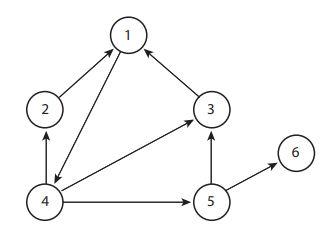

In [49]:
import numpy as np
# Parameter controlling the number of simulations
numsims = 5000

# Connectivity matrix of the network
G = np.array([[0,0,0,1,0,0],
              [1,0,0,0,0,0],
              [1,0,0,0,0,0],
              [0,1,1,0,1,0],
              [0,0,1,0,0,1],
              [0,0,0,0,0,0],
              ])
n = len(G)

# In MATLAB indices start at 1
# which we convert into Python indices here
state = 0
p = 0.85
M = np.zeros((n,n))

for i in range(n):
  for j in range(n):
    rowsum = np.sum(G[i,:])
    if rowsum == 0:
      # if there are no outgoing connections,
      # every page is equally likely
      rowsum = 1
    M[i,j] = p*G[i,j]/rowsum + (1-p)/n

pages = np.zeros(n)

print(f'Computed Probabilities from {numsims} simulations')
print('-'*65)
print(f'Simulations  Page 1   Page 2   Page 3   Page 4   Page 5   Page 6')
print('-'*65)

# Simulate a surfer’s session
for i in range(numsims):
  prob = np.random.random()

  if prob < M[state, 0]:
    state = 0
  elif prob < M[state,0] + M[state,1]:
    state = 1;
  elif prob < M[state,0] + M[state,1] + M[state,2]:
    state = 2
  elif prob < M[state,0] + M[state,1] + M[state,2] + M[state,3]:
    state = 3
  elif prob < M[state,0] + M[state,1] + M[state,2] + M[state,3] + M[state,4]:
    state = 4
  else:
     state = 5

  pages[state] += 1

  if (i+1)%(numsims/5) == 0:
    page_probs = pages/np.sum(pages)
    print(f'    {i+1}     ', end='')
    for page_prob in page_probs:
      print(f'{page_prob:.3f}', end='    ')

    print()

Computed Probabilities from 5000 simulations
-----------------------------------------------------------------
Simulations  Page 1   Page 2   Page 3   Page 4   Page 5   Page 6
-----------------------------------------------------------------
    1000     0.200    0.089    0.122    0.192    0.078    0.319    
    2000     0.197    0.083    0.121    0.196    0.080    0.325    
    3000     0.190    0.077    0.120    0.189    0.078    0.345    
    4000     0.189    0.077    0.117    0.186    0.078    0.354    
    5000     0.187    0.077    0.115    0.186    0.077    0.359    
